In [1]:
import json
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 100)

In [2]:
with open('data/daily_dialogue_annotated_v3.json', 'r', encoding="utf8") as f:
    daily = json.load(f)

In [3]:
with open('data/topical_chat_annotated_v3.json', 'r', encoding="utf8") as f:
    topical = json.load(f)

In [4]:
with open('data/daily_dialogue.txt', 'r', encoding="utf8") as file:
        daily_raw = file.readlines()
        
len(daily_raw)

13118

In [5]:
len(daily), len(topical)

(12376, 8628)

In [6]:
utter_len = list()

for idx, dialog in topical.items():
    utter_len.append(len(dialog))

np.mean(utter_len)

21.833333333333332

#### daily dialog

In [113]:
midas_cnt = Counter()
entity_cnt = Counter()

for data in daily.values():
    for ut in data:
        midas_cnt.update([max(midas, key=midas.get) for midas in ut['midas']])
        entity_cnt.update([ent['label'] for sent in ut['entities'] for ent in sent])
        
#         for sent in ut['entities']:
#             for ent in sent:
#                 if ent['label'] == 'national':
#                     print(ut['text'])
                           
midas_cnt = pd.DataFrame(data=midas_cnt.most_common(), columns=['label', 'counter'])
entity_cnt = pd.DataFrame(data=entity_cnt.most_common(), columns=['label', 'counter'])
midas_cnt['frac'] = midas_cnt['counter'] / midas_cnt[['counter']].sum().tolist()[0]
entity_cnt['frac'] = entity_cnt['counter'] / entity_cnt[['counter']].sum().tolist()[0]

In [117]:
midas_cnt

,label,counter,frac
0,statement,64686,0.407563
1,opinion,33696,0.212306
2,yes_no_question,14297,0.090080
3,open_question_factual,10667,0.067209
4,command,8386,0.052837
5,pos_answer,6483,0.040847
6,open_question_opinion,6148,0.038736
7,comment,6007,0.037848
8,complaint,3450,0.021737
9,neg_answer,2464,0.015525


In [114]:
entity_cnt

,label,counter,frac
0,misc,138109,0.649130
1,product,21560,0.101335
2,food,8688,0.040835
3,location,8235,0.038706
4,business,5201,0.024445
5,event,4474,0.021028
6,work_of_art,3410,0.016027
7,org,3377,0.015872
8,occupation,3191,0.014998
9,fac,2673,0.012563


In [6]:
{label: i for i, label in enumerate(entity_cnt.label.tolist())}

{'misc': 0,
 'product': 1,
 'location': 2,
 'film': 3,
 'work_of_art': 4,
 'business': 5,
 'person': 6,
 'org': 7,
 'occupation': 8,
 'type_of_sport': 9,
 'event': 10,
 'music_genre': 11,
 'literary_work': 12,
 'fac': 13,
 'academic_discipline': 14,
 'law': 15,
 'song': 16,
 'food': 17,
 'sport_team': 18,
 'norp': 19,
 'nation': 20,
 'animal': 21,
 'language': 22,
 'political_party': 23,
 'sports_event': 24,
 'sports_season': 25,
 'sports_venue': 26,
 'championship': 27,
 'sports_league': 28,
 'national': 29,
 'chemical_element': 30,
 'association_football_club': 31}

#### topical

In [3]:
midas_cnt = Counter()
entity_cnt = Counter()

for data in topical.values():
    for ut in data:
        midas_cnt.update([max(midas, key=midas.get) for midas in ut['midas']])
        entity_cnt.update([ent['label'] for sent in ut['entities'] for ent in sent])
        
#         for sent in ut['entities']:
#             for ent in sent:
#                 if ent['label'] == 'national':
#                     print(ut['text'])
                           
midas_cnt = pd.DataFrame(data=midas_cnt.most_common(), columns=['label', 'counter'])
entity_cnt = pd.DataFrame(data=entity_cnt.most_common(), columns=['label', 'counter'])
midas_cnt['frac'] = midas_cnt['counter'] / midas_cnt[['counter']].sum().tolist()[0]
entity_cnt['frac'] = entity_cnt['counter'] / entity_cnt[['counter']].sum().tolist()[0]

In [4]:
midas_cnt

,label,counter,frac
0,opinion,187733,0.369794
1,statement,162111,0.319324
2,comment,40866,0.080497
3,yes_no_question,40651,0.080074
4,pos_answer,27839,0.054837
5,open_question_factual,8420,0.016586
6,open_question_opinion,8236,0.016223
7,neg_answer,8062,0.015880
8,appreciation,8011,0.015780
9,complaint,6537,0.012877


In [5]:
entity_cnt

,label,counter,frac
0,misc,433858,0.542437
1,product,87700,0.109648
2,location,37028,0.046295
3,film,34454,0.043077
4,work_of_art,27069,0.033843
5,business,23373,0.029222
6,person,21580,0.026981
7,org,20081,0.025107
8,occupation,18952,0.023695
9,type_of_sport,13653,0.017070


In [8]:
{label: i for i, label in enumerate(entity_cnt.label.tolist())}

{'misc': 0,
 'product': 1,
 'location': 2,
 'film': 3,
 'work_of_art': 4,
 'business': 5,
 'person': 6,
 'org': 7,
 'occupation': 8,
 'type_of_sport': 9,
 'event': 10,
 'music_genre': 11,
 'literary_work': 12,
 'fac': 13,
 'academic_discipline': 14,
 'law': 15,
 'song': 16,
 'food': 17,
 'sport_team': 18,
 'norp': 19,
 'nation': 20,
 'animal': 21,
 'language': 22,
 'political_party': 23,
 'sports_event': 24,
 'sports_season': 25,
 'sports_venue': 26,
 'championship': 27,
 'sports_league': 28,
 'national': 29,
 'chemical_element': 30,
 'association_football_club': 31}

# MAIN

In [9]:
def parse_ut(ut: dict):
    zero_entity = list()
    one_entity = list()
    
    for sent, midas, entities in zip(ut['text'], ut['midas'], ut['entities']):
        
        if len(entities) > 1:
            continue
        
        if len(entities) == 0:
            zero_entity.append({
                'text': sent,
                'midas_label': max(midas, key=midas.get)
            })
            
        if len(entities) == 1:
            e = entities[0]
            one_entity.append({
            'text': sent[:e['offsets'][0]] + e['label'].upper() + sent[e['offsets'][1]:],
            'midas_label': max(midas, key=midas.get),
            'entity': e})
        
    return zero_entity, one_entity

def parse_dataset(dataset: dict):
    one_entity_df = list()
    zero_entity_df = list()
    
    for idx, dialogue in dataset.items():
        for ut in dialogue:
            
            zero_entity, one_entity = parse_ut(ut)
            
            zero_entity_df += zero_entity
            one_entity_df += one_entity
        
    return zero_entity_df, one_entity_df

## Topical

In [10]:
zero_entity_topical, one_entity_topical = parse_dataset(topical)
zero_entity_topical = pd.json_normalize(zero_entity_topical)
one_entity_topical = pd.json_normalize(one_entity_topical)
one_entity_topical.head()

,text,midas_label,entity.label,entity.offsets,entity.text
0,but I use it a MISC because I have to.,statement,misc,"[15, 18]",lot
1,which includes online MISC.,opinion,misc,"[22, 25]",ads
2,MISC.,pos_answer,misc,"[0, 4]",yeah
3,their MISC are good.,opinion,misc,"[6, 14]",services
4,I like PRODUCT.,opinion,product,"[7, 20]",google chrome


In [14]:
one_freq_topical = one_entity_topical.value_counts(["midas_label", "entity.label"]).reset_index()
one_freq_topical['category'] = one_freq_topical["midas_label"] + "+" + one_freq_topical["entity.label"]
one_freq_topical = one_freq_topical.iloc[:, [3,2,0,1]].rename(columns = {0: "counter"})
one_freq_topical.head()

,category,counter,midas_label,entity.label
0,opinion+misc,44843,opinion,misc
1,statement+misc,27446,statement,misc
2,pos_answer+misc,17650,pos_answer,misc
3,comment+misc,14366,comment,misc
4,yes_no_question+misc,6731,yes_no_question,misc


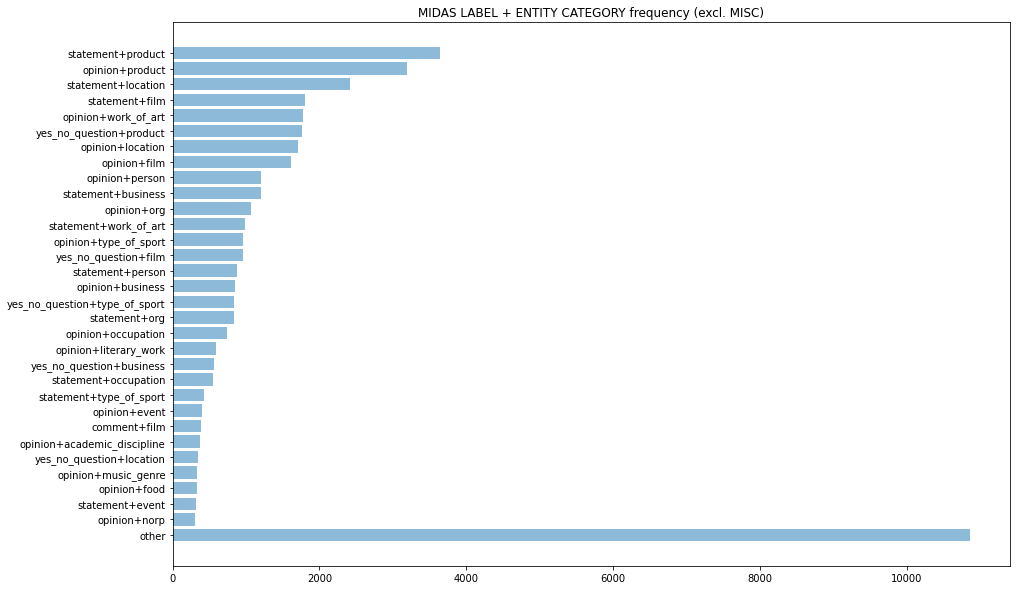

In [17]:
#defining the threshold 
df_topical = one_freq_topical[one_freq_topical['entity.label'] != 'misc'].iloc[:, [0,1]]
threshold = 300
mask = df_topical['counter'] < threshold
df_topical1 = df_topical[~mask].copy()
df_topical1.loc[df_topical.shape[0]+1] = df_topical.loc[mask, 'counter'].sum()

labels_topical = df_topical1.category.tolist()
labels_topical[-1] = 'other'
y_pos_topical = np.arange(len(labels_topical))
counter_topical = df_topical1.counter.tolist()

plt.figure(figsize=(15,10))
plt.barh(y_pos_topical, counter_topical, align='center', alpha=0.5)
plt.yticks(y_pos_topical, labels_topical)
plt.gca().invert_yaxis()
plt.title('MIDAS LABEL + ENTITY CATEGORY frequency (excl. MISC)')
plt.savefig("img/groupings_topical.png")

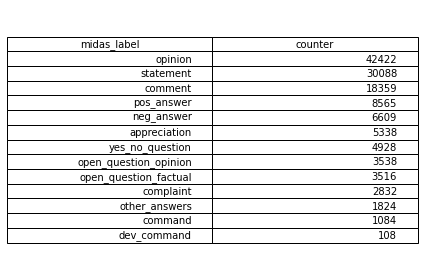

In [15]:
zero_freq_topical = zero_entity_topical.value_counts(["midas_label"]).reset_index().rename(
    columns = {0: "counter"})
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=zero_freq_topical.values, colLabels=zero_freq_topical.columns, loc='center')
fig.tight_layout()
plt.savefig("img/zero_ent_by_midas_topical.png")

In [14]:
zero_entity_topical[zero_entity_topical.midas_label == 'appreciation'].head(30)

,text,midas_label
1,Interesting.,appreciation
28,Thats pretty cool.,appreciation
43,Interesting!,appreciation
51,That is cool.,appreciation
64,That interesting.,appreciation
65,That's really interesting.,appreciation
89,That's pretty interesting!,appreciation
115,That's interesting!,appreciation
123,That is pretty cool.,appreciation
126,that is so cool.,appreciation


In [50]:
result = one_entity_topical.to_json(orient="records")
parsed = json.loads(result)  

one_entity_topical = {}

for sample in parsed:
    category = sample['midas_label'] + "__" + sample['entity.label']
    
    if category not in one_entity_topical:
        one_entity_topical[category] = [sample['text'].strip()]
    else:
        one_entity_topical[category].append(sample['text'].strip())
        
with open('data/one_entity_topical.json', 'w', encoding='utf-8') as f:
    json.dump(one_entity_topical, f, ensure_ascii=False, indent=4)

In [51]:
result = zero_entity_topical.to_json(orient="records")
parsed = json.loads(result)

zero_entity_topical = {}

for sample in parsed:
    if sample['midas_label'] not in zero_entity_topical:
        zero_entity_topical[sample['midas_label']] = [sample['text'].strip()]
    else:
        zero_entity_topical[sample['midas_label']].append(sample['text'].strip())
        
with open('data/zero_entity_topical.json', 'w', encoding='utf-8') as f:
    json.dump(zero_entity_topical, f, ensure_ascii=False, indent=4)

## Daily

In [13]:
zero_entity_daily, one_entity_daily = parse_dataset(daily)
zero_entity_daily = pd.json_normalize(zero_entity_daily)
one_entity_daily = pd.json_normalize(one_entity_daily)
one_entity_daily.head()

,text,midas_label,entity.label,entity.offsets,entity.text
0,Your FOOD looks really fresh!,opinion,food,"[5, 10]",fruit
1,How much are these FOOD?,open_question_factual,food,"[19, 25]",apples
2,The FOOD are 30NT each.,statement,food,"[4, 10]",apples
3,How many MISC you like?,open_question_opinion,misc,"[9, 14]",would
4,How about these FOOD?,open_question_opinion,food,"[16, 26]",pineapples


In [116]:
one_entity_daily[one_entity_daily.midas_label == 'appreciation']

,text,midas_label,entity.label,entity.offsets,entity.text
268,MISC.,appreciation,misc,"[0, 4]",cool
323,MISC good!,appreciation,misc,"[0, 6]",sounds
517,That ’ s great MISC.,appreciation,misc,"[15, 19]",idea
602,That ’ s a great MISC.,appreciation,misc,"[17, 21]",idea
608,MISC.,appreciation,misc,"[0, 5]",great
...,...,...,...,...,...
57352,That's very good MISC!,appreciation,misc,"[17, 23]",advice
57582,That ’ s a good MISC!,appreciation,misc,"[16, 20]",idea
57594,That ’ s a great MISC.,appreciation,misc,"[17, 21]",idea
57637,MISC.,appreciation,misc,"[0, 3]",wow


In [14]:
one_freq_daily = one_entity_daily.value_counts(["midas_label", "entity.label"]).reset_index()
one_freq_daily['category'] = one_freq_daily["midas_label"] + "+" + one_freq_daily["entity.label"]
one_freq_daily = one_freq_daily.iloc[:, [3,2,0,1]].rename(columns = {0: "counter"})
one_freq_daily.head()

,category,counter,midas_label,entity.label
0,statement+misc,16826,statement,misc
1,opinion+misc,9433,opinion,misc
2,yes_no_question+misc,4102,yes_no_question,misc
3,open_question_factual+misc,3548,open_question_factual,misc
4,pos_answer+misc,3429,pos_answer,misc


In [21]:
one_freq_daily[one_freq_daily['entity.label'] == 'anaphor']

,category,counter,midas_label,entity.label


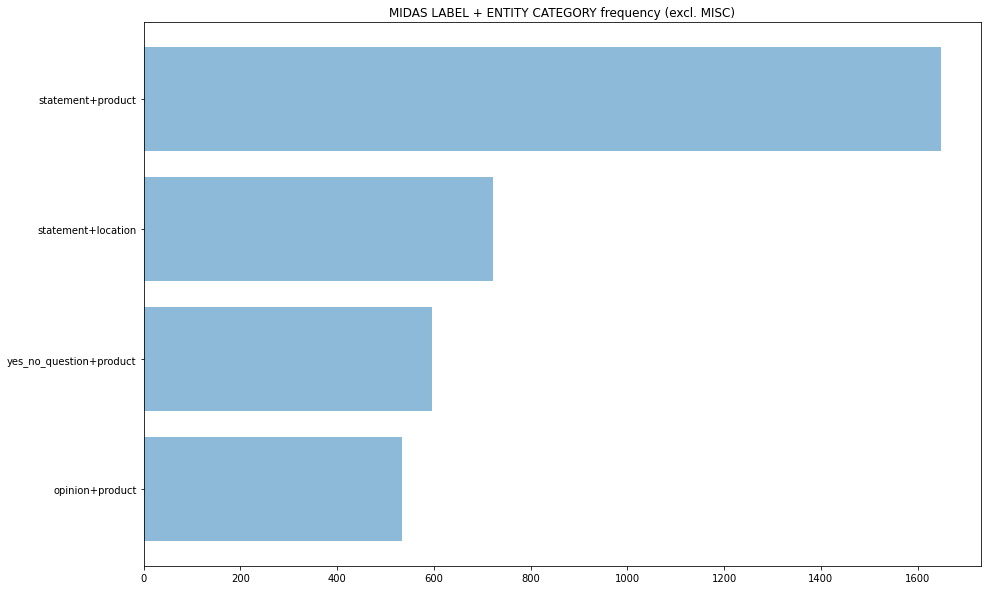

In [36]:
#defining the threshold 
df_daily = one_freq_daily[~one_freq_daily['entity.label'].isin(['misc', 'anaphor'])].iloc[:, [0,1]]
threshold = 500
mask = df_daily['counter'] < threshold
df_daily1 = df_daily[~mask].copy()
# df_daily1.loc[df_daily.shape[0]+1] = df_daily.loc[mask, 'counter'].sum()

labels_daily = df_daily1.category.tolist()
# labels_daily[-1] = 'other'
y_pos_daily = np.arange(len(labels_daily))
counter_daily = df_daily1.counter.tolist()

plt.figure(figsize=(15,10))
plt.barh(y_pos_daily, counter_daily, align='center', alpha=0.5)
plt.yticks(y_pos_daily, labels_daily)
plt.gca().invert_yaxis()
plt.title('MIDAS LABEL + ENTITY CATEGORY frequency (excl. MISC)')
plt.savefig("img/groupings_daily.png")

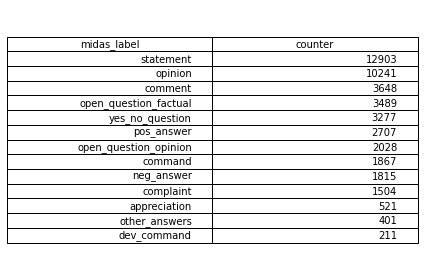

In [38]:
zero_freq_daily = zero_entity_daily.value_counts(["midas_label"]).reset_index().rename(
    columns = {0: "counter"})
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=zero_freq_daily.values, colLabels=zero_freq_daily.columns, loc='center')
fig.tight_layout()
plt.savefig("img/zero_ent_by_midas_daily.png")

In [42]:
zero_entity_daily[zero_entity_daily.midas_label == 'appreciation'].head(10)

,text,midas_label
65,Sounds good.,appreciation
198,"Oh, wow, that's cool.",appreciation
357,Interesting.,appreciation
457,Great!,appreciation
586,That's great.,appreciation
860,"Oh, that sounds great.",appreciation
1010,That ’ s great.,appreciation
1051,That's brilliant!,appreciation
1253,That's great.,appreciation
1280,Sounds good.,appreciation


In [58]:
result = one_entity_daily.to_json(orient="records")
parsed = json.loads(result)  

one_entity_daily = {}

for sample in parsed:
    category = sample['midas_label'] + "__" + sample['entity.label']
    
    if category not in one_entity_daily:
        one_entity_daily[category] = [sample['text'].strip()]
    else:
        one_entity_daily[category].append(sample['text'].strip())
        
with open('data/one_entity_daily.json', 'w', encoding='utf-8') as f:
    json.dump(one_entity_daily, f, ensure_ascii=False, indent=4)

In [59]:
result = zero_entity_daily.to_json(orient="records")
parsed = json.loads(result)

zero_entity_daily = {}

for sample in parsed:
    if sample['midas_label'] not in zero_entity_daily:
        zero_entity_daily[sample['midas_label']] = [sample['text'].strip()]
    else:
        zero_entity_daily[sample['midas_label']].append(sample['text'].strip())
        
with open('data/zero_entity_daily.json', 'w', encoding='utf-8') as f:
    json.dump(zero_entity_daily, f, ensure_ascii=False, indent=4)